In [1]:
import os 
project = '100knock-process-visualization'
chapter = 2
os.chdir(f'/Users/nakamuraayaka/{project}/chapter-{chapter}/')

(chart2_env)  
python=3.9.13
matplotlib==3.5.2  
pandas==1.1.5  
seaborn==0.11.1   


[excelの読み込み参照ページ](https://qiita.com/hasepy/items/06d5d2e2b6495752442c)

# ２章 ＥＸＣＥＬデータの加工・可視化を行う２０本ノック

## ノック２１：Excelデータを読み込んでみよう

In [2]:
import pandas as pd
data = pd.read_excel('data/1-2-2020.xlsx')
data.head()

,１－（２）．都道府県別発電所数、出力数 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,２０２０年 ８月３日公表時点,Unnamed: 21,（単位：kW）
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風力,NaN,太陽光,...,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,NaN,NaN,NaN,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計
3,北海道,98,2032077.6,32,6176880,1,2070000,56,428134,127,...,3,96650,3,49920,184,1128885.1,0,0,315,11407842.7
4,青森県,19,128750,10,655750,1,1100000,24,593870,35,...,4,134850,1,18800,59,993867,0,0,89,2878367


実際のデータは4行目から。

In [3]:
data.tail()

,１－（２）．都道府県別発電所数、出力数 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,２０２０年 ８月３日公表時点,Unnamed: 21,（単位：kW）
49,沖縄県,0,0,26,2470080,0,0,13,18130,1,...,0,0,0,0,14,30130,0,0,40,2500210
50,合 計,1748,49638035.6,461,169249967,15,33083000,315,3647239.2,2562,...,78,2483852,61,971126,2893,14865055.2,2,42910,5119,266878967.8
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,備考,１ バイオマスまたは廃棄物の欄には、専ら又は主として使用する燃料がバイオマス又は廃棄物の場合...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,２ 一つの発電所内に複数の発電機が存在し、電源種別が異なる場合には、発電所数は最大出力が最大...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


終わりは備考欄までも入っている。.


skiprows：先頭の何行を読み込まないか指定する引数  
skipfooter：最後の何行を読み込まないか指定する引数

### 4行目(index番号=３)から読み込む 

In [4]:
data = pd.read_excel('data/1-2-2020.xlsx',skiprows=4, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


### 末尾の備考欄も削除

In [5]:
data.drop(data.tail(4).index, inplace=True)  # data.tail(4).indexで末尾4行の取得
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
42,熊本県,49,803395.0,5.0,1562280.0,0.0,0.0,2.0,26000.0,81.0,...,1.0,76780.0,2.0,10500.0,83.0,258540.0,0.0,0.0,137.0,2624215.0
43,大分県,38,300520.0,9.0,4111600.0,0.0,0.0,1.0,11000.0,53.0,...,4.0,118200.0,0.0,0.0,60.0,558694.6,0.0,0.0,107.0,4970814.6
44,宮崎県,48,2158730.0,4.0,204940.0,0.0,0.0,1.0,16000.0,35.0,...,3.0,76700.0,0.0,0.0,36.0,264774.5,0.0,0.0,88.0,2628444.5
45,鹿児島県,35,195808.0,30.0,1307600.0,1.0,1780000.0,18.0,225470.0,143.0,...,2.0,72700.0,0.0,0.0,164.0,877953.0,0.0,0.0,230.0,4161361.0
46,沖縄県,0,0.0,26.0,2470080.0,0.0,0.0,13.0,18130.0,1.0,...,0.0,0.0,0.0,0.0,14.0,30130.0,0.0,0.0,40.0,2500210.0


## ノック２２：カラムを抽出して付与してみよう

In [6]:
col_data = pd.read_excel('data/1-2-2020.xlsx',skiprows=1, header=None)
col_data = col_data.head(3)
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風力,NaN,太陽光,...,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,NaN,NaN,NaN,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


NaNはセル結合の影響(列方向と、行方向の見極めが必要!!)

### ＜行方向の処理＞

In [7]:
col_data.iloc[1,1:].fillna(col_data.iloc[0,1:],inplace=True)  # ２行目のNaNの部分に、１行目の文字列を埋める
col_data.iloc[1,1:] = col_data.iloc[1,1:].str.replace('発電所','')  # ◯◯発電所　→◯◯　にして、新エネルギーの表記に合わせる
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,水力,NaN,火力,NaN,原子力,NaN,風力,NaN,太陽光,...,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,その他,NaN,合計,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


### ＜列方向の処理＞

In [8]:
for i in col_data.columns:
    if i < col_data.columns.max():  # エラー対策！最終列までiを移動させてはだめ。（i+1がない）
        col_data[i+1].fillna(col_data[i], inplace=True)
col_data


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,水力発電所,火力発電所,火力発電所,原子力発電所,原子力発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,...,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,その他,その他,合計,合計
1,NaN,水力,水力,火力,火力,原子力,原子力,風力,風力,太陽光,...,〔バイオマス〕,〔バイオマス〕,〔廃棄物〕,〔廃棄物〕,計,計,その他,その他,合計,合計
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


バイオマス、廃棄物だけについている[]を消す

In [9]:
col_data.replace('〔バイオマス〕','バイオマス',inplace=True)
col_data.replace('〔廃棄物〕','廃棄物',inplace=True)
col_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,水力発電所,火力発電所,火力発電所,原子力発電所,原子力発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,...,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,その他,その他,合計,合計
1,NaN,水力,水力,火力,火力,原子力,原子力,風力,風力,太陽光,...,バイオマス,バイオマス,廃棄物,廃棄物,計,計,その他,その他,合計,合計
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,...,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


カラム名が、[新エネルギー等発電所_バイオマス_発電所数]　のようになるよう、結合していく  
※まだNaNもあるため、欠損値を無視する処理も必要

＜お試し＞

In [10]:
tg_col = '_'.join(list(col_data[0].dropna()))
print(tg_col)
tg_col = '_'.join(list(col_data[1].dropna()))
print(tg_col)

都道府県
水力発電所_水力_発電所数


＜実践＞

In [11]:
cols =[]
for i in col_data.columns:
    tg_col = '_'.join(list(col_data[i].dropna()))
    cols.append(tg_col)
cols

['都道府県',
 '水力発電所_水力_発電所数',
 '水力発電所_水力_最大出力計',
 '火力発電所_火力_発電所数',
 '火力発電所_火力_最大出力計',
 '原子力発電所_原子力_発電所数',
 '原子力発電所_原子力_最大出力計',
 '新エネルギー等発電所_風力_発電所数',
 '新エネルギー等発電所_風力_最大出力計',
 '新エネルギー等発電所_太陽光_発電所数',
 '新エネルギー等発電所_太陽光_最大出力計',
 '新エネルギー等発電所_地熱_発電所数',
 '新エネルギー等発電所_地熱_最大出力計',
 '新エネルギー等発電所_バイオマス_発電所数',
 '新エネルギー等発電所_バイオマス_最大出力計',
 '新エネルギー等発電所_廃棄物_発電所数',
 '新エネルギー等発電所_廃棄物_最大出力計',
 '新エネルギー等発電所_計_発電所数',
 '新エネルギー等発電所_計_最大出力計',
 'その他_その他_発電所数',
 'その他_その他_最大出力計',
 '合計_合計_発電所数',
 '合計_合計_最大出力計']

カラム名の取得完了  
データに代入

In [12]:
data.columns = cols
data.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


## ノック２３：全シートのデータを読み込んでみよう

In [13]:
xl = pd.ExcelFile('data/1-2-2020.xlsx')
sheets = xl.sheet_names  # シート名をリストで取得
sheets

['2020.4',
 '2020.5',
 '2020.6',
 '2020.7',
 '2020.8',
 '2020.9',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.1']

＜お試し＞

In [14]:
data = xl.parse(sheets[0],  skiprows=4, header=None)  # parse：シートの読み込み
data.drop(data.tail(4).index, inplace=True)
data.columns = cols
data.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


＜実践＞  年月はデータに入っていないため、[年月]の列を作成する

In [15]:
datas = []  # pandasのデータフレームを、リストに追加していく
for sheet in sheets:
    data = xl.parse(sheet, skiprows=4, header=None)
    data.drop(data.tail(4).index, inplace=True)
    data.columns = cols
    data['年月'] = sheet
    datas.append(data)
datas

[    都道府県 水力発電所_水力_発電所数  水力発電所_水力_最大出力計  火力発電所_火力_発電所数  火力発電所_火力_最大出力計  \
 0    北海道            98       2032077.6           32.0       6176880.0   
 1    青森県            19        128750.0           10.0        655750.0   
 2    岩手県            40        274661.0            3.0        238000.0   
 3    宮城県            22         63915.0           10.0       2211050.0   
 4    秋田県            42        287863.0            4.0       2497550.0   
 5    山形県            42        401814.0            3.0        750750.0   
 6    福島県            94       3973025.0           12.0      11626600.0   
 7    茨城県             6         13450.0           16.0       9985120.0   
 8    栃木県            33       2942130.0            3.0       1291200.0   
 9    群馬県            74       3126512.0            3.0         45350.0   
 10   埼玉県            13         68580.0            3.0        151200.0   
 11   千葉県             1           132.0           22.0      20049525.0   
 12   東京都             5         44750.

このままでは、データフレームとして使えないので、結合する。→concatはリスト型で渡す必要があるため

In [16]:
datas = pd.concat(datas, ignore_index=True)  # ignore_index=True インデックスを振り直してくれる
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計,年月
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,...,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7,2020.4
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,...,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0,2020.4
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,...,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4,2020.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,...,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0,2020.4
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,...,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2,2020.4


In [17]:
len(datas)

470

## ノック２４：データの値を計算で修正しよう

備考欄にあるように、火力の値に、新エネルギーのバイオマス、廃棄物の値も含まれている。（二重で計上されている）  
火力の値から、引き算する

In [18]:
datas['火力発電所_火力_発電所数'] = datas['火力発電所_火力_発電所数'] - datas['新エネルギー等発電所_バイオマス_発電所数'] - datas['新エネルギー等発電所_廃棄物_発電所数']
datas['火力発電所_火力_最大出力計'] = datas['火力発電所_火力_最大出力計'] - datas['新エネルギー等発電所_バイオマス_最大出力計'] - datas['新エネルギー等発電所_廃棄物_最大出力計']
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,...,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計,年月
0,北海道,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,...,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7,2020.4
1,青森県,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,...,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0,2020.4
2,岩手県,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,...,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4,2020.4
3,宮城県,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,...,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0,2020.4
4,秋田県,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,...,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2,2020.4


## ノック２５：必要なカラムだけに絞り込もう

In [19]:
datas.drop(['合計_合計_発電所数', '合計_合計_最大出力計', '新エネルギー等発電所_計_発電所数', '新エネルギー等発電所_計_最大出力計'], axis=1, inplace=True)
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,年月
0,北海道,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,0.0,0.0,2020.4
1,青森県,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,0.0,0.0,2020.4
2,岩手県,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,0.0,0.0,2020.4
3,宮城県,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,0.0,0.0,2020.4
4,秋田県,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,0.0,0.0,2020.4


## ノック２６：縦持ちデータを作成しよう

縦持ちデータにすることで、可視化の際にデータの抽出や指定がしやすい

In [20]:
datas_v = pd.melt(datas, id_vars=['都道府県','年月'], var_name="変数名",value_name="値")  # id_vars:キーとなる列
datas_v.head()

,都道府県,年月,変数名,値
0,北海道,2020.4,水力発電所_水力_発電所数,98
1,青森県,2020.4,水力発電所_水力_発電所数,19
2,岩手県,2020.4,水力発電所_水力_発電所数,40
3,宮城県,2020.4,水力発電所_水力_発電所数,22
4,秋田県,2020.4,水力発電所_水力_発電所数,42


## ノック２７：縦持ちデータを整形しよう

変数名のアンダーバー区切りを、別の列に分ける　？

In [21]:
var_data = datas_v['変数名'].str.split('_', expand=True)
var_data.head()

,0,1,2
0,水力発電所,水力,発電所数
1,水力発電所,水力,発電所数
2,水力発電所,水力,発電所数
3,水力発電所,水力,発電所数
4,水力発電所,水力,発電所数


カラム名を付け直し、元のデータに結合。

In [22]:
var_data.columns = ['発電所種別', '発電種別', '項目']
datas_v = pd.concat([datas_v, var_data], axis=1)
datas_v.drop(['変数名'], axis=1, inplace=True)
datas_v.head()

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


## ノック２８：発電実績データを加工しよう

In [23]:
capacity_data = pd.read_excel('data/2-2-2020.xlsx')

In [24]:
display(capacity_data.head())

,２－（２）．都道府県別発電実績 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,２０２０年８月３日公表時点,Unnamed: 10,"（単位：1,000kWh）"
0,都道府県,水力発電所,火力発電所,原子力発電所,新エネルギー等発電所,NaN,NaN,NaN,NaN,NaN,その他,合計
1,NaN,NaN,NaN,NaN,風力,太陽光,地熱,〔バイオマス〕,〔廃棄物〕,計,NaN,NaN
2,NaN,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量
3,北海道,408779.3,1838320.47,0.0,86901.404,104709.672,10354.0,100682.0,32870.0,201965.076,0.0,2449064.846
4,青森県,50945.0,189372.0,0.0,130363.28,52596.6659,0.0,73726.0,6823.0,182959.9459,0.0,423276.9459


In [25]:
display(capacity_data.tail())

,２－（２）．都道府県別発電実績 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,２０２０年８月３日公表時点,Unnamed: 10,"（単位：1,000kWh）"
48,鹿児島県,34701.0,70601.0,654763.0,26101.985,74286.66,25633.0,30089.0,0.0,126021.645,0.0,886086.645
49,沖縄県,0.0,478257.0,0.0,2653.0,1215.0,0.0,1758.0,0.0,3868.0,0.0,482125.0
50,合 計,8296665.947,46596894.9142,4631681.89,709349.955,1596008.836673,159402.0,1428699.17284,316874.30255,2464760.791673,17256.0,62007262.965873
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,備考,バイオマスまたは廃棄物の欄には、専ら又は主として使用する燃料がバイオマス又は廃棄物の場合には...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


カラムの編集

In [26]:
col_ca_data = pd.read_excel('data/2-2-2020.xlsx', skiprows=1, header=None)
col_ca_data = col_ca_data.head(3)

col_ca_data.iloc[1,1:].fillna(col_ca_data.iloc[0,1:], inplace=True)
col_ca_data.iloc[1, 1:] = col_ca_data.iloc[1, 1:].str.replace('発電所','')

for i in col_ca_data.columns:
  if i < col_ca_data.columns.max():
    col_ca_data[i + 1].fillna(col_ca_data[i], inplace=True)
col_ca_data.replace('〔バイオマス〕','バイオマス', inplace=True)
col_ca_data.replace('〔廃棄物〕','廃棄物', inplace=True)

cols_ca = []
for i in col_ca_data.columns:
  tg_col = '_'.join(list(col_ca_data[i].dropna()))
  cols_ca.append(tg_col)
cols_ca

['都道府県',
 '水力発電所_水力_電力量',
 '火力発電所_火力_電力量',
 '原子力発電所_原子力_電力量',
 '新エネルギー等発電所_風力_電力量',
 '新エネルギー等発電所_太陽光_電力量',
 '新エネルギー等発電所_地熱_電力量',
 '新エネルギー等発電所_バイオマス_電力量',
 '新エネルギー等発電所_廃棄物_電力量',
 '新エネルギー等発電所_計_電力量',
 'その他_その他_電力量',
 '合計_合計_電力量']

In [27]:
xl_ca = pd.ExcelFile('data/2-2-2020.xlsx')
sheets = xl_ca.sheet_names
ca_datas = []
for sheet in sheets:
  capacity_data = xl_ca.parse(sheet,  skiprows=4, header=None)
  capacity_data = capacity_data.head(47)
  capacity_data.columns = cols_ca
  capacity_data['年月'] = sheet
  ca_datas.append(capacity_data)
ca_datas = pd.concat(ca_datas, ignore_index=True)
ca_datas.head()

,都道府県,水力発電所_水力_電力量,火力発電所_火力_電力量,原子力発電所_原子力_電力量,新エネルギー等発電所_風力_電力量,新エネルギー等発電所_太陽光_電力量,新エネルギー等発電所_地熱_電力量,新エネルギー等発電所_バイオマス_電力量,新エネルギー等発電所_廃棄物_電力量,新エネルギー等発電所_計_電力量,その他_その他_電力量,合計_合計_電力量,年月
0,北海道,408779.3,1838320.47,0.0,86901.404,104709.6720,10354.0,100682.00,32870.0,201965.0760,0.0,2.449065e+06,2020.4
1,青森県,50945.0,189372.00,0.0,130363.280,52596.6659,0.0,73726.00,6823.0,182959.9459,0.0,4.232769e+05,2020.4
2,岩手県,144505.0,56981.05,0.0,31640.883,31047.0000,21889.0,56371.05,0.0,84576.8830,0.0,2.860629e+05,2020.4
3,宮城県,33697.0,943982.00,0.0,5176.000,68463.1100,0.0,72447.00,25211.0,73639.1100,0.0,1.051318e+06,2020.4
4,秋田県,122188.0,1135707.37,0.0,109050.502,14774.3000,42218.0,13966.37,7599.0,166042.8020,0.0,1.423938e+06,2020.4


In [28]:
# 二重計上のものを引き算
ca_datas['火力発電所_火力_電力量'] = ca_datas['火力発電所_火力_電力量'] - ca_datas['新エネルギー等発電所_バイオマス_電力量'] - ca_datas['新エネルギー等発電所_廃棄物_電力量']
# いらない列の削除
ca_datas.drop(['合計_合計_電力量','新エネルギー等発電所_計_電力量'], axis=1, inplace=True)
# 縦持ちデータにする
ca_datas_v = pd.melt(ca_datas, id_vars=['都道府県','年月'], var_name="変数名",value_name="値")
# _区切りだったものを分割して、新たな列名を付ける
var_data = ca_datas_v['変数名'].str.split('_', expand=True)
var_data.columns = ['発電所種別', '発電種別', '項目']
# データに結合する
ca_datas_v = pd.concat([ca_datas_v, var_data], axis=1)
# いらなくなった列の削除
ca_datas_v.drop(['変数名'], axis=1, inplace=True)
ca_datas_v.head()

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,408779.3,水力発電所,水力,電力量
1,青森県,2020.4,50945.0,水力発電所,水力,電力量
2,岩手県,2020.4,144505.0,水力発電所,水力,電力量
3,宮城県,2020.4,33697.0,水力発電所,水力,電力量
4,秋田県,2020.4,122188.0,水力発電所,水力,電力量


In [29]:
ca_datas_v.tail()

,都道府県,年月,値,発電所種別,発電種別,項目
4225,熊本県,2021.1,0.0,その他,その他,電力量
4226,大分県,2021.1,0.0,その他,その他,電力量
4227,宮崎県,2021.1,0.0,その他,その他,電力量
4228,鹿児島県,2021.1,0.0,その他,その他,電力量
4229,沖縄県,2021.1,0.0,その他,その他,電力量


## ノック２９：可視化用データを仕上げよう

「発電所数、出力数」のエクセルデータと、「発電実績」のエクセルデータを結合

In [30]:
datas_v_all = pd.concat([datas_v, ca_datas_v], ignore_index=True)
display(datas_v_all.head())
display(datas_v_all.tail())

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


,都道府県,年月,値,発電所種別,発電種別,項目
12685,熊本県,2021.1,0.0,その他,その他,電力量
12686,大分県,2021.1,0.0,その他,その他,電力量
12687,宮崎県,2021.1,0.0,その他,その他,電力量
12688,鹿児島県,2021.1,0.0,その他,その他,電力量
12689,沖縄県,2021.1,0.0,その他,その他,電力量


### 発電所別での合計を表示

pd.pivot_table()を使用する  
クロス集計表
[参考URL](https://kino-code.com/pandas_pivot_table/)

In [31]:
pd.pivot_table(datas_v_all.loc[datas_v_all['年月']=='2020.4'], index='発電所種別', columns='項目', values='値', aggfunc='sum')


項目,最大出力計,発電所数,電力量
発電所種別,,,
その他,4.291000e+04,2.0,1.725600e+04
原子力発電所,3.308300e+07,15.0,4.631682e+06
新エネルギー等発電所,1.832003e+07,3032.0,4.210335e+06
水力発電所,4.963804e+07,1748.0,8.296664e+06
火力発電所,1.657950e+08,322.0,4.485132e+07


## ノック３０：データ分布をヒストグラムで可視化してみよう

In [32]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'
import seaborn as sns

ヒストグラム・・・どの数字がだいたいどの程度の範囲にどう分布しているかを押さえることができる  
正規分布なのかどうかは、特に押さえること！

<AxesSubplot:ylabel='Count'>

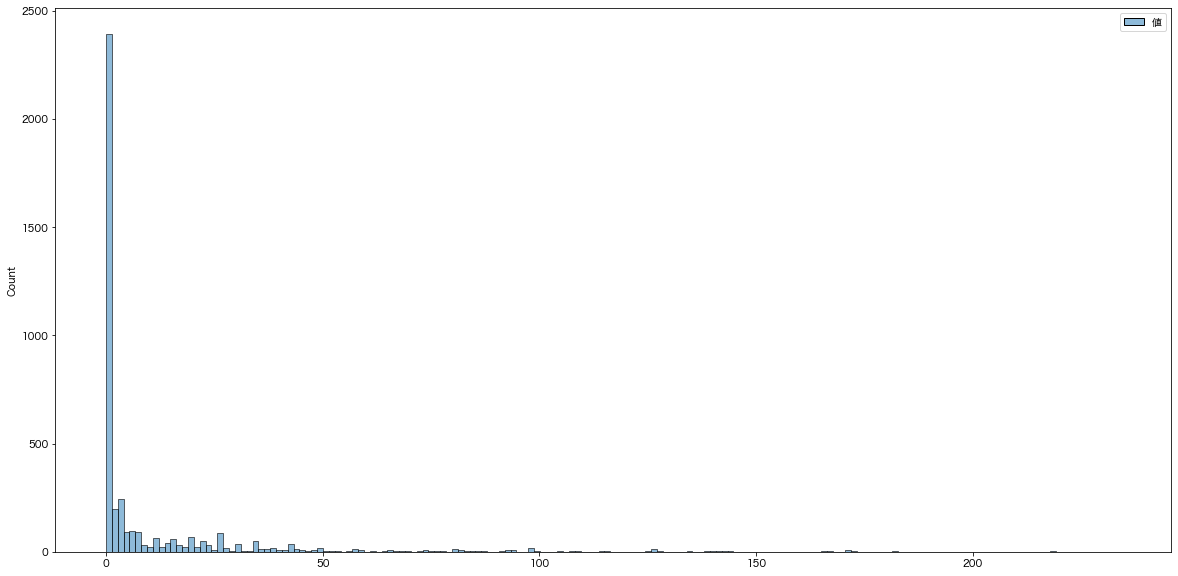

In [33]:
plt.figure(figsize=(20,10))
sns.histplot(datas_v_all.loc[datas_v_all['項目']=='発電所数'])

<AxesSubplot:ylabel='Count'>

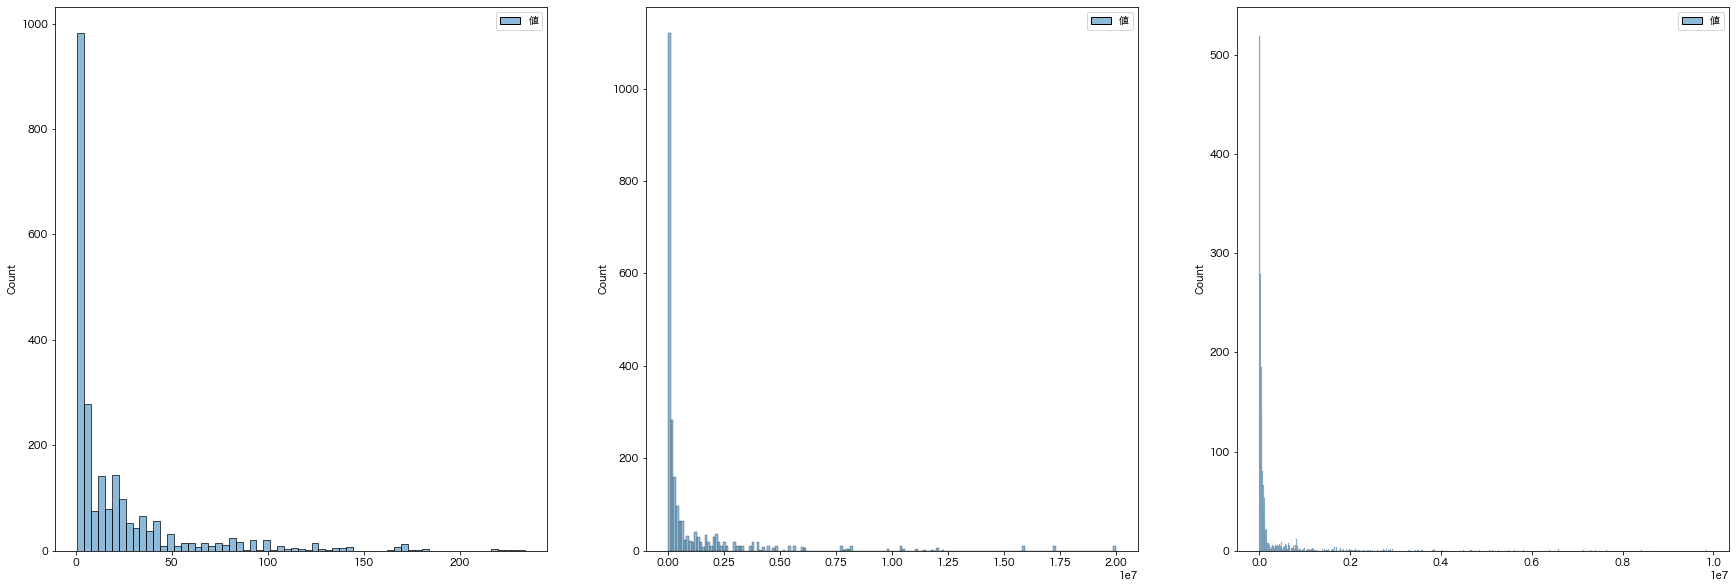

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # ３つのグラフを用意
viz_data = datas_v_all.loc[datas_v_all['値']!=0]  # 0を除外する
sns.histplot(viz_data.loc[viz_data['項目']=='発電所数'], ax=axes[0])
sns.histplot(viz_data.loc[viz_data['項目']=='最大出力計'], ax=axes[1])
sns.histplot(viz_data.loc[viz_data['項目']=='電力量'], ax=axes[2])

## ノック３１：データ分布を箱ひげ図で可視化してみよう

ヒストグラムだと中央値がどのあたりなのか、ひと目ではわからないので箱ひげ図

<AxesSubplot:ylabel='値'>

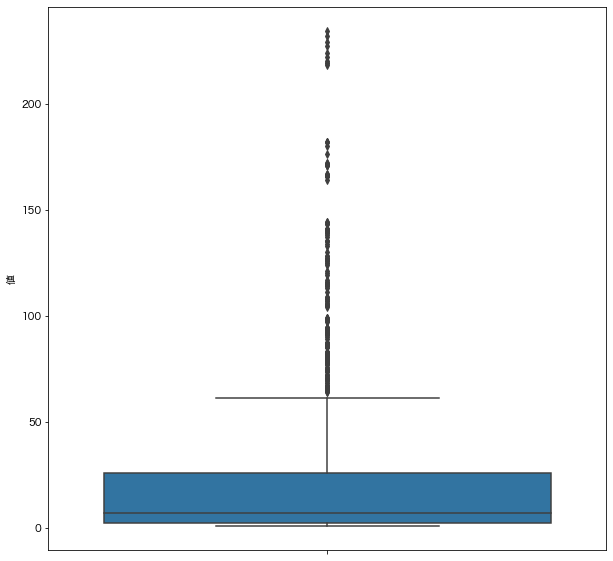

In [35]:
plt.figure(figsize=(10, 10))
viz_data = datas_v_all.loc[(datas_v_all['項目']=='発電所数')&(datas_v_all['値']!=0)]
sns.boxplot(y=viz_data['値'])

箱の中にある線が、中央値を示している

### 発電種別ごとに箱ひげ図を出してみる

<AxesSubplot:xlabel='発電種別', ylabel='値'>

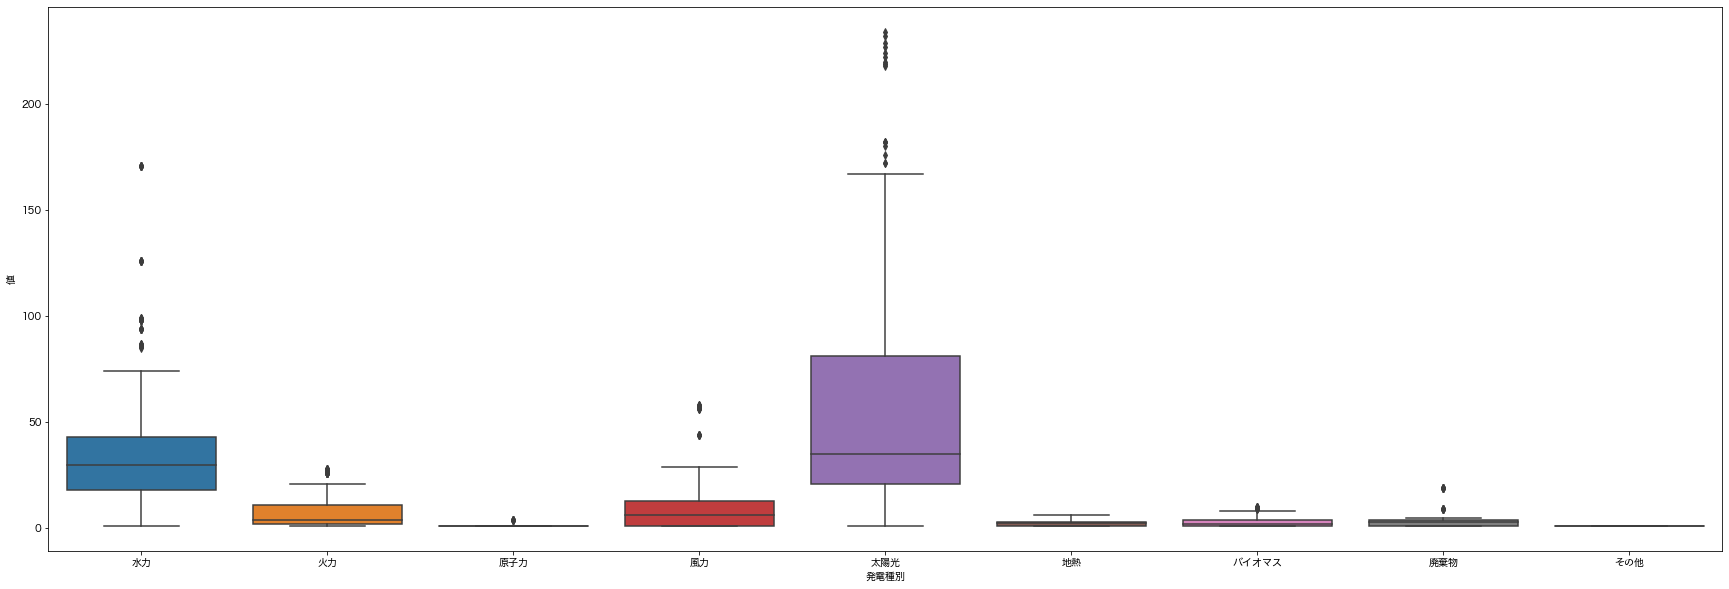

In [36]:
plt.figure(figsize=(30, 10))
sns.boxplot(x=viz_data['発電種別'], y=viz_data['値'])

発電所数が多いと考えられるのは、水力、太陽光。  
中央値はどちらも同じくらいだが、分布は太陽光の方が比較的均一に分布しているといえる。

### [応用]発電種別ごとにバイオリンプロットを出してみる

In [37]:
# エラーが出てしまう箇所（型の変換が必要だった）

# plt.figure(figsize=(30, 10))
# sns.violinplot(x=viz_data['発電種別'], y=viz_data['値'])

できない・・・

In [38]:
print("Original Types: ",datas_v_all.dtypes )

Original Types:  都道府県     object
年月       object
値        object
発電所種別    object
発電種別     object
項目       object
dtype: object


object型はサポートされていないという意味？？  
そもそもobject型とはなにか。  
[参考URL](https://note.nkmk.me/python-numpy-dtype-astype/)  
```
object型は特殊なデータ型で、Pythonオブジェクトへのポインターを格納する。
各要素のデータの実体はそれぞれメモリ領域を確保するので、一つの配列ndarray内に複数の型のデータ（へのポインタ）をもつことができる。  
```
## Pythonが型を宣言しなくても良い理由がわかった！！  
[参考資料](https://qiita.com/niwaka_dev/items/d5ef280e4eed2279ebe4)  
```
Pythonの変数は、C言語でいうポインタと同じで、型情報や値を一つにまとめたオブジェクトのアドレスを示しているからです。
```



In [39]:
display(datas_v_all.head())
display(datas_v_all.tail())

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


,都道府県,年月,値,発電所種別,発電種別,項目
12685,熊本県,2021.1,0.0,その他,その他,電力量
12686,大分県,2021.1,0.0,その他,その他,電力量
12687,宮崎県,2021.1,0.0,その他,その他,電力量
12688,鹿児島県,2021.1,0.0,その他,その他,電力量
12689,沖縄県,2021.1,0.0,その他,その他,電力量


値が、小数点を含むため念の為float型を用意

In [40]:
#データ型の変換
viz_data['値'] = viz_data['値'].astype('float')

/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_42977/1685185227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_data['値'] = viz_data['値'].astype('float')


In [41]:
print(viz_data['発電種別'].dtypes)
print(viz_data['値'].dtypes)

object
float64


<AxesSubplot:xlabel='発電種別', ylabel='値'>

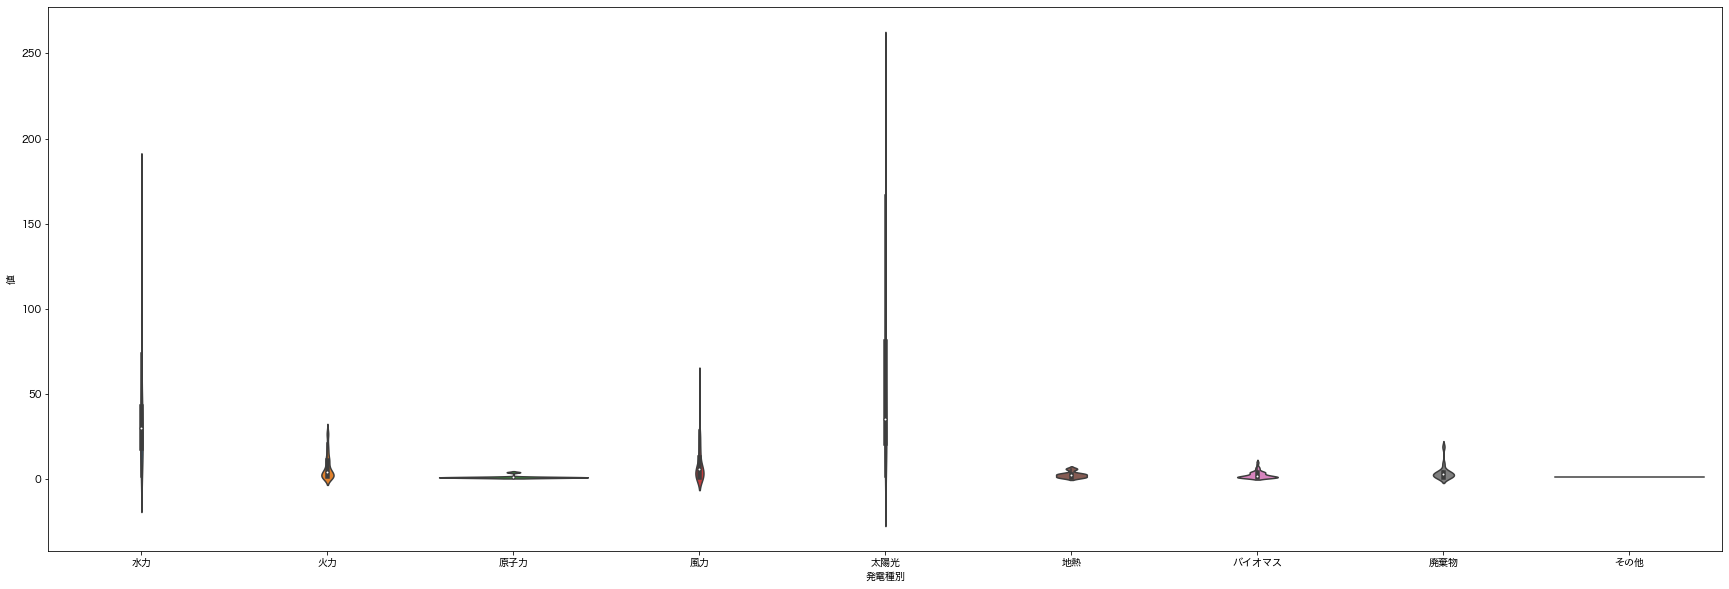

In [42]:
plt.figure(figsize=(30, 10))
sns.violinplot(x=viz_data['発電種別'], y=viz_data['値'])

ちいさい・・・?


seabornでのプロットサイズの変更の仕方  
[seabornでMatplotlibの見た目を良くする](https://note.nkmk.me/python-matplotlib-seaborn-basic/)  
[Seaborn プロットサイズを変更する](https://www.delftstack.com/ja/howto/seaborn/size-of-seaborn-plot/)  
[seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

<AxesSubplot:xlabel='発電種別', ylabel='値'>

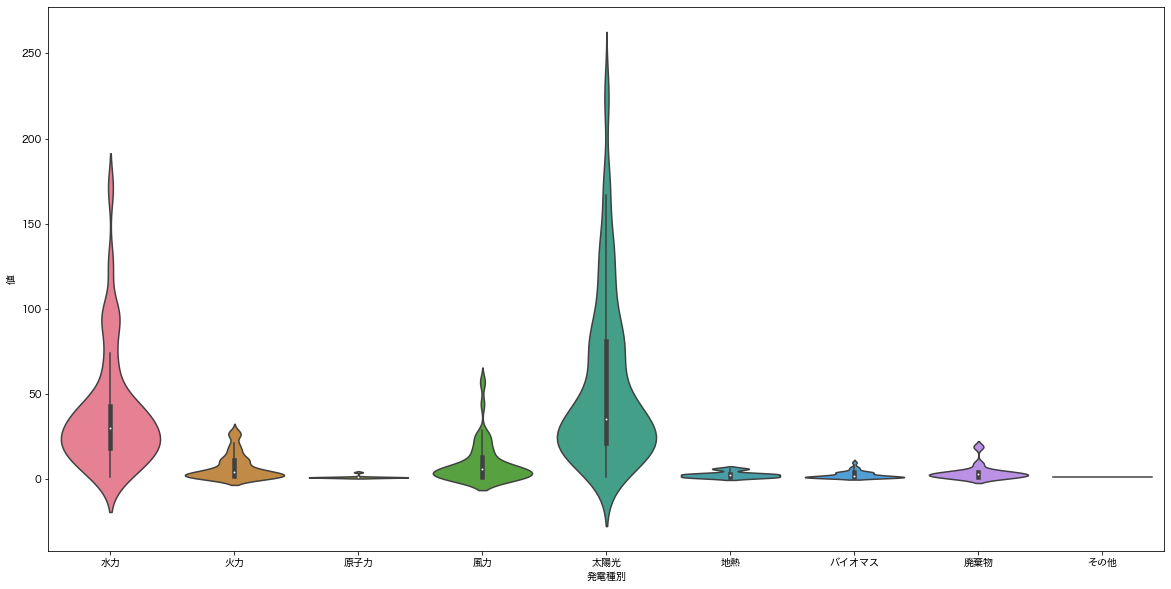

In [43]:
plt.figure(figsize=(20, 10))
sns.violinplot(x=viz_data['発電種別'], y=viz_data['値'],
scale="width", palette="husl")

## PDF化

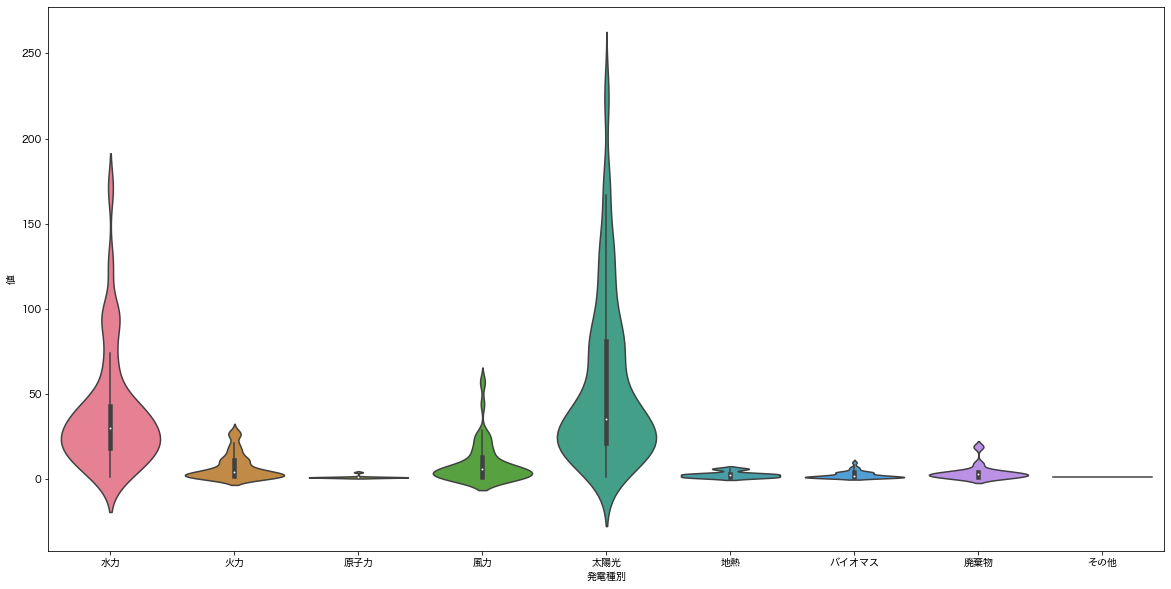

In [44]:
#ファイル名と出力先ディレクトリを指定
graph_file = "Violinplot.pdf"
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

#　保存 (一緒に実行しなければならないっぽい)
plt.figure(figsize=(20, 10))
sns.violinplot(x=viz_data['発電種別'], y=viz_data['値'],
scale="width", palette="husl")
plt.savefig(os.path.join(output_dir, graph_file))

```
●scale{“area”, “count”, “width”}, optional
The method used to scale the width of each violin. If area, each violin will have the same area. If count, the width of the violins will be scaled by the number of observations in that bin. If width, each violin will have the same width.
●palettepalette name, list, or dict
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.
```

<AxesSubplot:xlabel='値', ylabel='発電種別'>

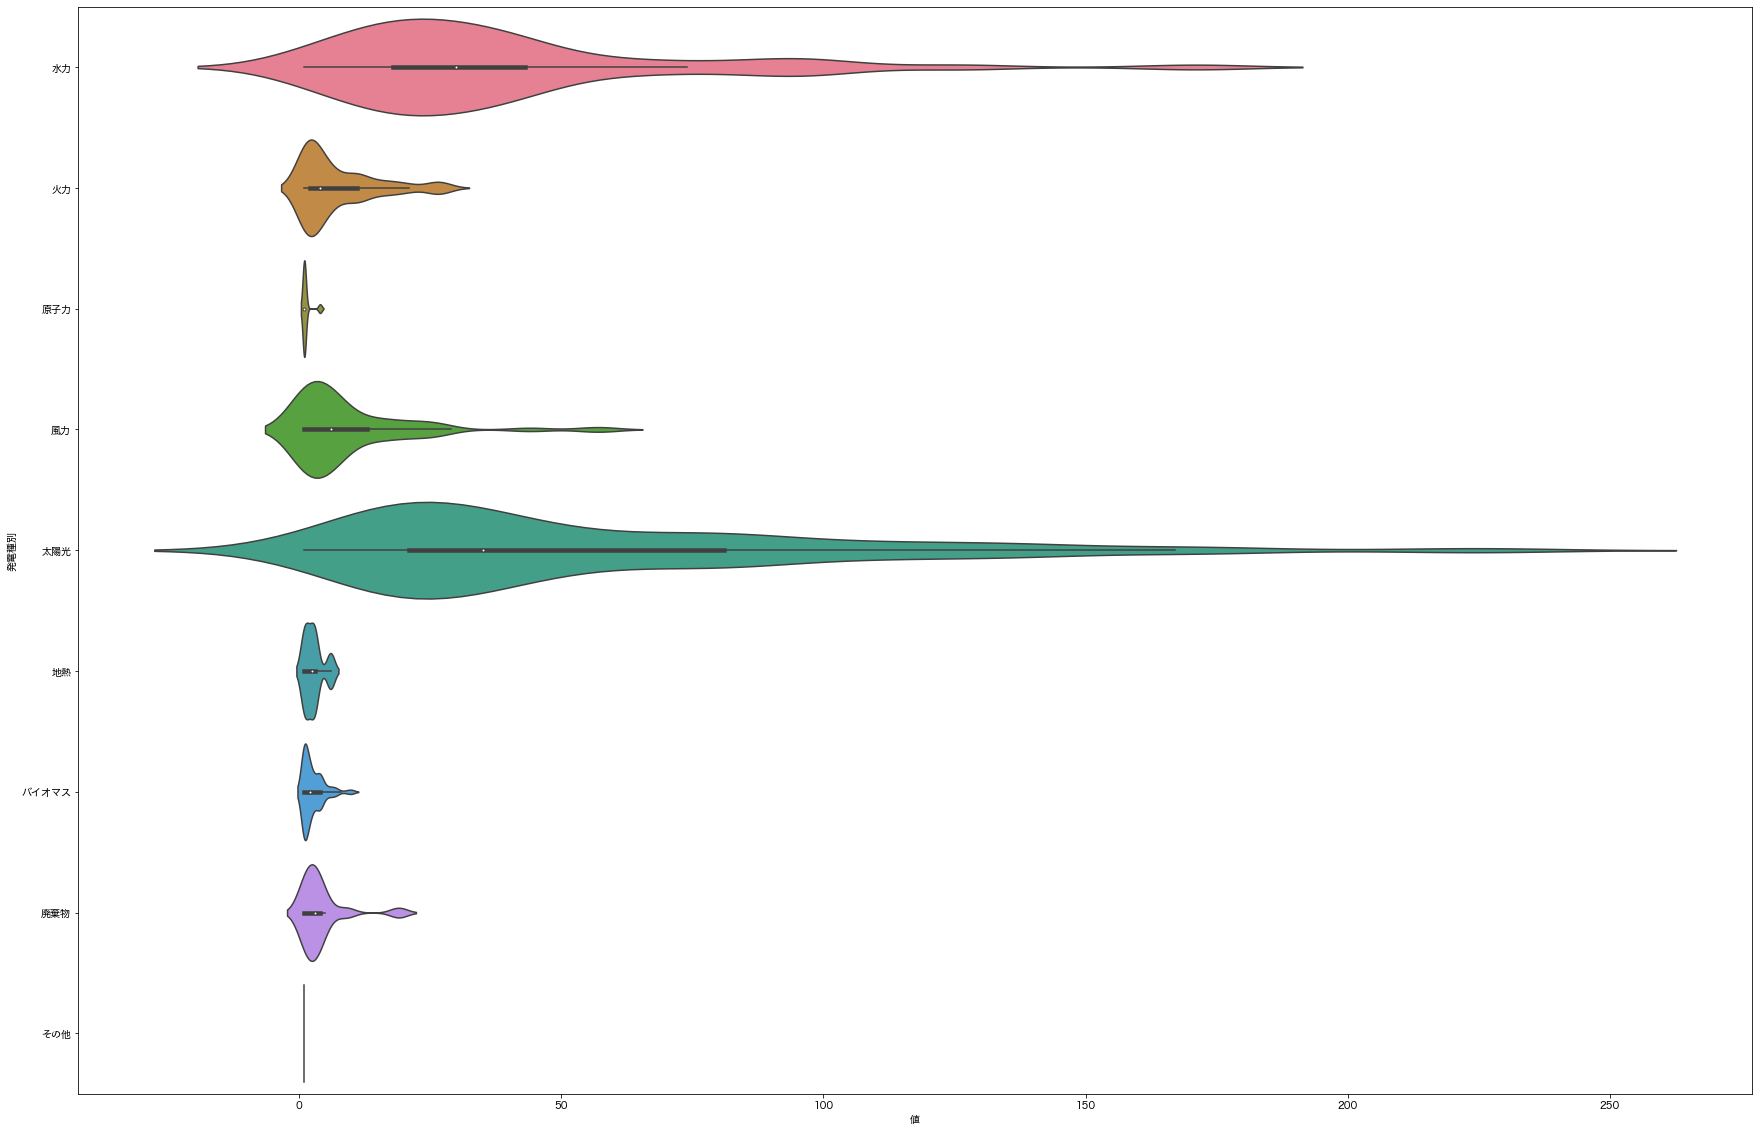

In [45]:
plt.figure(figsize=(30, 20))
sns.violinplot(x=viz_data['値'], y=viz_data['発電種別'],
scale="width", palette="husl")

## ノック３２：最近の発電量を可視化してみよう

直近である2021.1のデータを持ってくる。発電所別の発電量の合計

In [46]:

viz_data = datas_v_all[['発電種別','値']].loc[(datas_v_all['項目']=='電力量')&(datas_v_all['年月']=='2021.1')]
viz_data = viz_data.groupby('発電種別', as_index=False).sum()
viz_data

,発電種別,値
0,その他,1.382000e+04
1,バイオマス,1.743504e+06
2,原子力,2.582599e+06
3,地熱,1.881800e+05
4,太陽光,1.777285e+06
5,廃棄物,3.159551e+05
6,水力,5.183845e+06
7,火力,7.456928e+07
8,風力,9.067438e+05


火力が多いが、可視化した方が差がわかりやすい

<AxesSubplot:xlabel='発電種別', ylabel='値'>

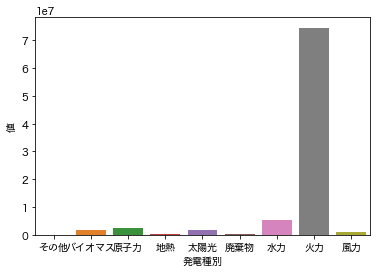

In [47]:
sns.barplot(x=viz_data['発電種別'], y=viz_data['値'])

## ノック３３：先月の発電量とあわせて可視化してみよう

In [48]:
viz_data = datas_v_all[['発電種別','年月','値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby(['発電種別','年月'],as_index=False).sum()
viz_data.head()

,発電種別,年月,値
0,その他,2020.10,21670.7
1,その他,2020.11,15571.3
2,その他,2020.12,15759.0
3,その他,2020.4,17256.0
4,その他,2020.5,16782.0


<AxesSubplot:xlabel='発電種別', ylabel='値'>

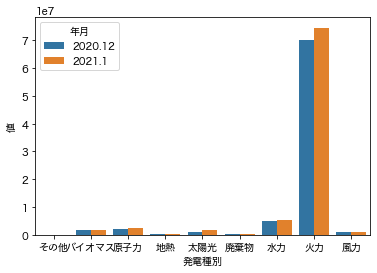

In [49]:
viz_data = viz_data.loc[(viz_data['年月']=='2020.12')|(viz_data['年月']=='2021.1')]
sns.barplot(x=viz_data['発電種別'], y=viz_data['値'], hue=viz_data['年月'])

## ノック３４：電力の時系列変化を可視化してみよう

時系列の可視化は折れ線グラフが主流

<AxesSubplot:xlabel='年月', ylabel='値'>

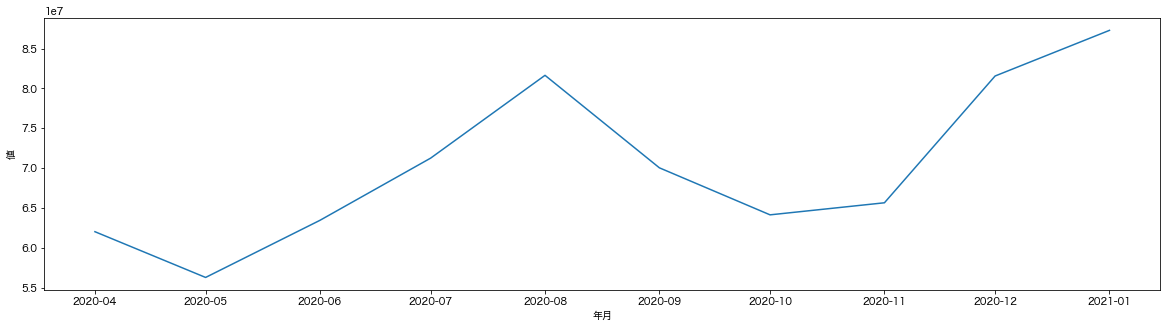

In [50]:
plt.figure(figsize=(20, 5))
viz_data = datas_v_all[['発電種別','年月','値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby('年月',as_index=False).sum()
viz_data['年月'] = pd.to_datetime(viz_data['年月'])  # 文字列をdatetime型に変換
sns.lineplot(x=viz_data['年月'], y=viz_data["値"])

冷房を使用する7,8月　暖房を使用する12,1月の電力量が多い

<AxesSubplot:xlabel='年月', ylabel='値'>

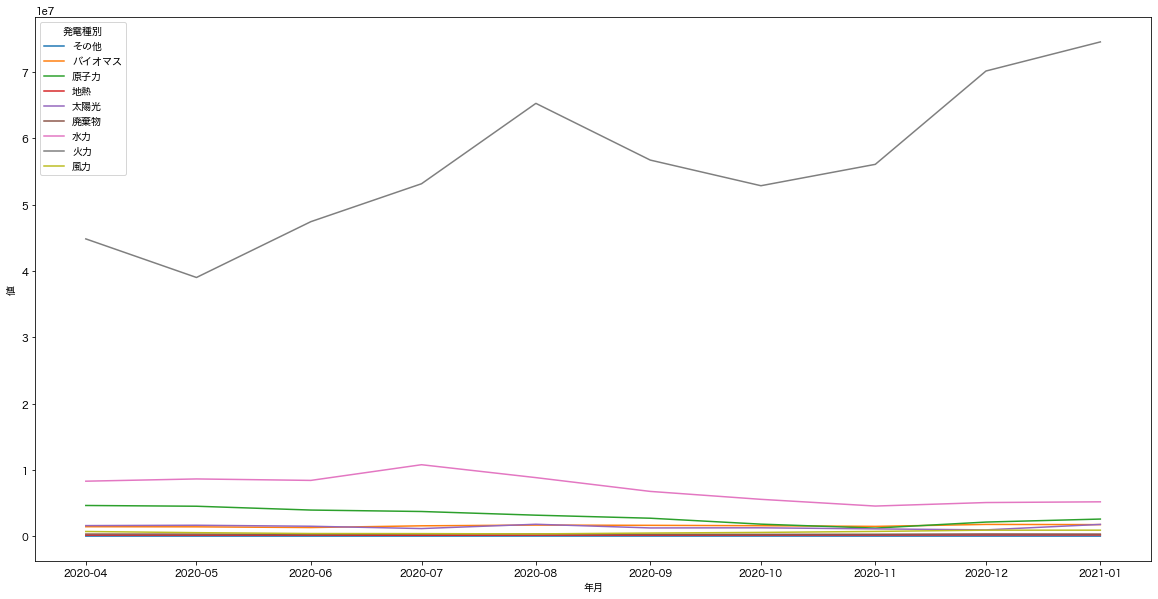

In [51]:
plt.figure(figsize=(20, 10))
viz_data = datas_v_all[['発電種別','年月','値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby(['発電種別','年月'],as_index=False).sum()
viz_data['年月'] = pd.to_datetime(viz_data['年月'])
sns.lineplot(x=viz_data['年月'], y=viz_data["値"], hue=viz_data['発電種別']) # hueで色分けされている

## PDF化

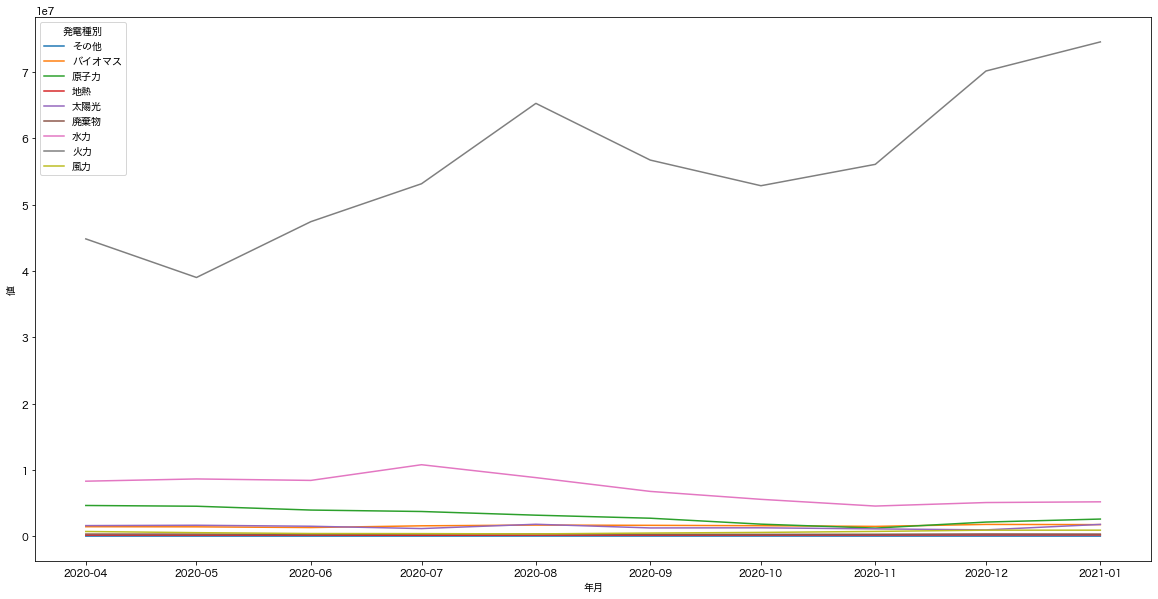

In [52]:
#ファイル名と出力先ディレクトリを指定
graph_file = "Lineplot.pdf"
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

#　保存 (一緒に実行しなければならないっぽい)
plt.figure(figsize=(20, 10))
sns.lineplot(x=viz_data['年月'], y=viz_data["値"], hue=viz_data['発電種別'])
plt.savefig(os.path.join(output_dir, graph_file))

## ノック３５：電力の割合を可視化してみよう

In [53]:
viz_data = datas_v_all.loc[(datas_v_all['項目']=='電力量')&(datas_v_all['年月']=='2021.1')]
viz_data = viz_data[['発電種別','値']].groupby('発電種別').sum()
viz_data['割合'] = viz_data['値'] / viz_data['値'].sum()
viz_data

,値,割合
発電種別,,
その他,1.382000e+04,0.000158
バイオマス,1.743504e+06,0.019976
原子力,2.582599e+06,0.029589
地熱,1.881800e+05,0.002156
太陽光,1.777285e+06,0.020363
廃棄物,3.159551e+05,0.003620
水力,5.183845e+06,0.059392
火力,7.456928e+07,0.854357
風力,9.067438e+05,0.010389


割合の可視化で思い浮かびやすいのは円グラフだが、推奨されてはいない。
円　なので中心に行くと小さく、外に向かう度大きくなり錯覚を引き起こすため正確な割合を把握できない。  
→***積み上げ棒グラフで代替する***

<AxesSubplot:>

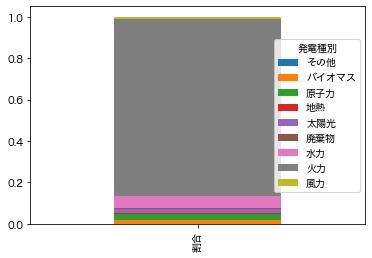

In [54]:
viz_data.T.loc[['割合']].plot(kind='bar', stacked=True)

## ノック３６：電力量の多い都道府県を比較してみよう

In [55]:
viz_data = datas_v_all.loc[datas_v_all['項目']=='電力量']
viz_data = viz_data[['都道府県','値']].groupby('都道府県', as_index=False).sum()
viz_data.sort_values('値', inplace=True, ascending=False)
viz_data.head(5)

,都道府県,値
5,千葉県,6.846871e+07
32,神奈川県,6.587427e+07
24,愛知県,5.512558e+07
35,福島県,4.805125e+07
3,兵庫県,3.940553e+07


千葉、神奈川の順に電力を発電していることがわかる  
時系列変化を比較してみる

<AxesSubplot:xlabel='年月', ylabel='値'>

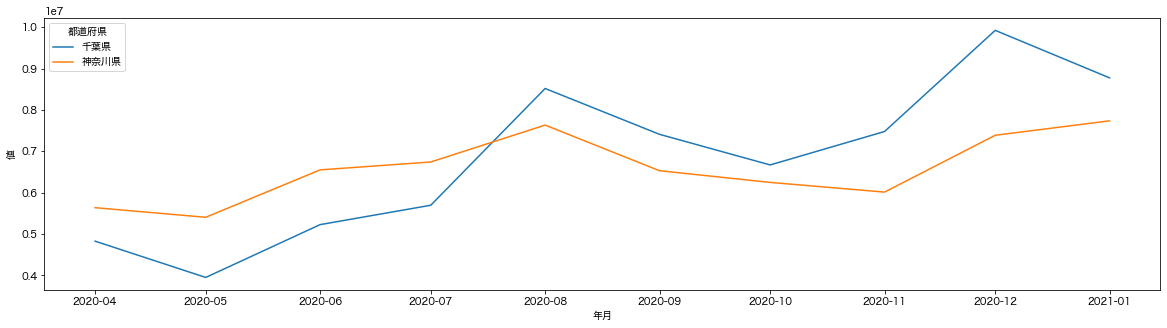

In [56]:
plt.figure(figsize=(20, 5))
viz_data = datas_v_all[['都道府県','年月','値']].loc[(datas_v_all['項目']=='電力量')&((datas_v_all['都道府県']=='神奈川県')|(datas_v_all['都道府県']=='千葉県'))]
viz_data = viz_data.groupby(['年月', '都道府県'],as_index=False).sum()
viz_data['年月'] = pd.to_datetime(viz_data['年月'])
sns.lineplot(x=viz_data['年月'], y=viz_data["値"], hue=viz_data['都道府県'])

8月以降に千葉県の発電量が上回っている  
このデータに、発電所数が関係しているかもしれないので、発電所数のデータも付加する

In [57]:
viz_data_num = datas_v_all[['都道府県','年月','値']].loc[(datas_v_all['項目']=='発電所数')&((datas_v_all['都道府県']=='神奈川県')|(datas_v_all['都道府県']=='千葉県'))]
viz_data_num = viz_data_num.groupby(['年月', '都道府県'],as_index=False).sum()
viz_data_num['年月'] = pd.to_datetime(viz_data_num['年月'])
viz_data.rename(columns={'値':'電力量'}, inplace=True)
viz_data_num.rename(columns={'値':'発電所数'}, inplace=True)
viz_data_join = pd.merge(viz_data, viz_data_num, on=['年月', '都道府県'], how='left')
viz_data_join.head()

,年月,都道府県,電力量,発電所数
0,2020-10-01,千葉県,6.669303e+06,215.0
1,2020-10-01,神奈川県,6.247037e+06,91.0
2,2020-11-01,千葉県,7.477717e+06,217.0
3,2020-11-01,神奈川県,6.012612e+06,91.0
4,2020-12-01,千葉県,9.923473e+06,217.0


バブルチャートで可視化する

<Figure size 1440x720 with 0 Axes>

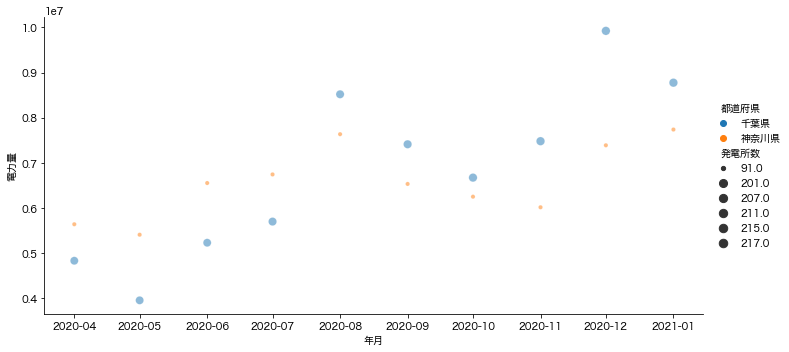

In [58]:
plt.figure(figsize=(20, 10))
sns.relplot(x=viz_data_join['年月'],  y=viz_data_join['電力量'], 
            hue=viz_data_join['都道府県'], size=viz_data_join['発電所数'],
            alpha=0.5, height=5, aspect=2)

## ノック３７：都道府県、年月別の電力量を可視化してみよう

47都道府県もあるため、折れ線グラフは不適切  
マトリックス形式が良いのではないか。

In [59]:
# 縦軸、都道府県。横軸、年月。の表を作成

viz_data = datas_v_all[['都道府県','年月','値']].loc[datas_v_all['項目']=='電力量']
viz_data = viz_data.groupby(['年月', '都道府県'],as_index=False).sum()
viz_data['年月'] = pd.to_datetime(viz_data['年月']).dt.date

viz_data = viz_data.pivot_table(values='値', columns='年月', index='都道府県')
viz_data.head(5)

年月,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01
都道府県,,,,,,,,,,
三重県,1.349405e+06,901335.970,1814280.009,2001288.775,2339055.384,2176175.440,1625270.932,1633717.587,2333101.224,2.348822e+06
京都府,5.929500e+05,351386.128,612870.361,706082.494,820243.087,533828.981,1243810.123,1218301.034,1308063.902,1.386963e+06
佐賀県,1.725664e+06,1785971.682,1720771.768,1779755.565,1797063.399,1365760.063,924763.770,1034117.906,1415937.714,9.242634e+05
兵庫県,2.930287e+06,2536819.110,2916812.450,3867951.026,4959183.008,4028458.119,3450951.342,3563811.595,5234037.260,5.917215e+06
北海道,2.449065e+06,2279432.176,2192311.572,2164165.677,2284534.519,2188168.217,2234014.644,2481590.732,3161554.743,3.571886e+06


<AxesSubplot:xlabel='年月', ylabel='都道府県'>

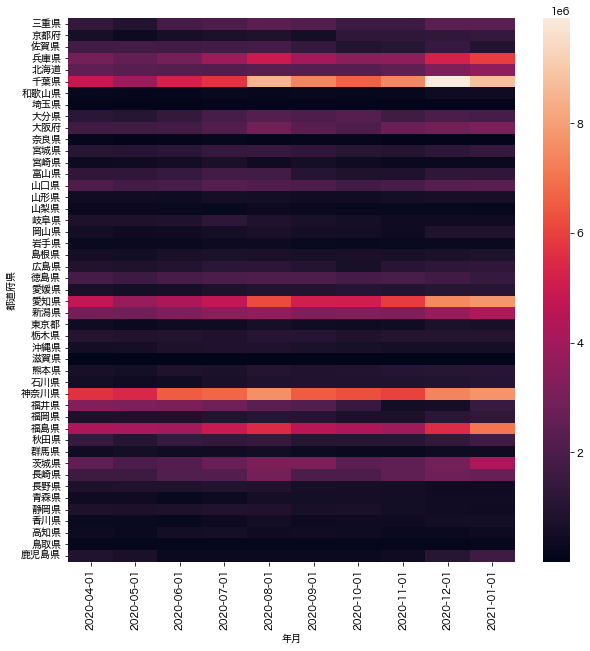

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(viz_data)

## PDF化

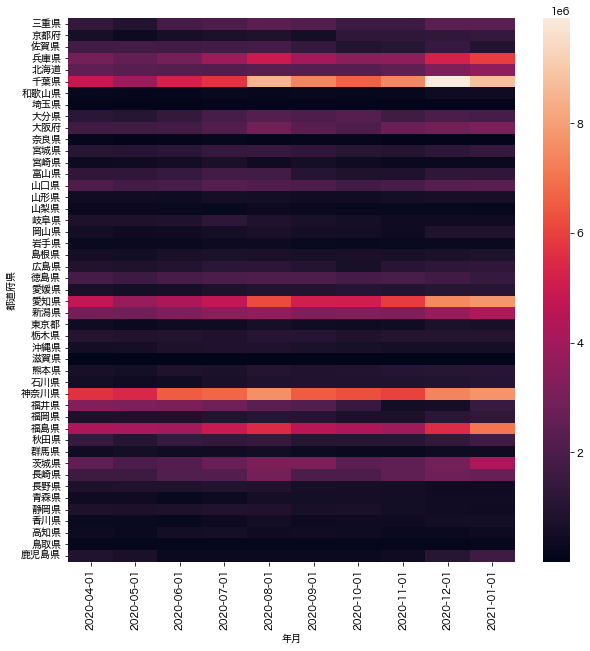

In [61]:
#ファイル名と出力先ディレクトリを指定
graph_file = "Heatmap.pdf"
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

#　保存 (一緒に実行しなければならないっぽい)
plt.figure(figsize=(10,10))
sns.heatmap(viz_data)
plt.savefig(os.path.join(output_dir, graph_file))

## ノック３８：変数の関係性を可視化してみよう

### 変数の関係性を見るときは、横持ちデータの方が早い。  

横持ちデータを使いたいので、ノック25のdatesを用いる。  
また、数値でない行も削除

In [62]:
viz_data = datas.drop(['都道府県','年月'],axis=1)
viz_data.head(5)

,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,その他_その他_発電所数,その他_その他_最大出力計
0,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,0.0,0.0
1,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,0.0,0.0
2,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,0.0,0.0
3,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,0.0,0.0
4,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,0.0,0.0


変数の関係性を可視化するグラフは散布図や、散布図とヒストグラム

<AxesSubplot:xlabel='水力発電所_水力_発電所数', ylabel='水力発電所_水力_最大出力計'>

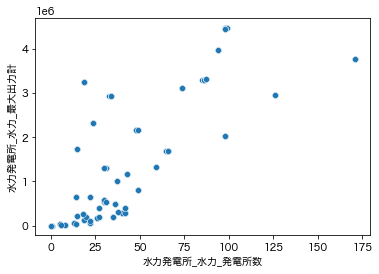

In [63]:
sns.scatterplot(x=viz_data['水力発電所_水力_発電所数'], y=viz_data['水力発電所_水力_最大出力計'])

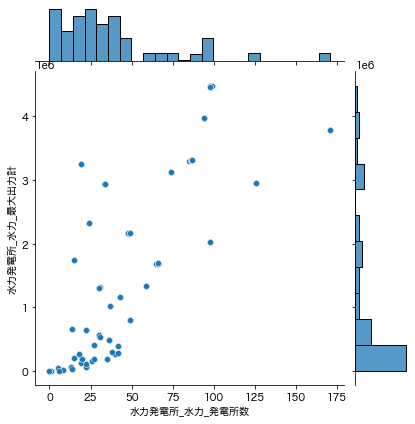

In [64]:
sns.jointplot(x=viz_data['水力発電所_水力_発電所数'], y=viz_data['水力発電所_水力_最大出力計'])

もっと他の変数も一気に見たい場合、pairplot

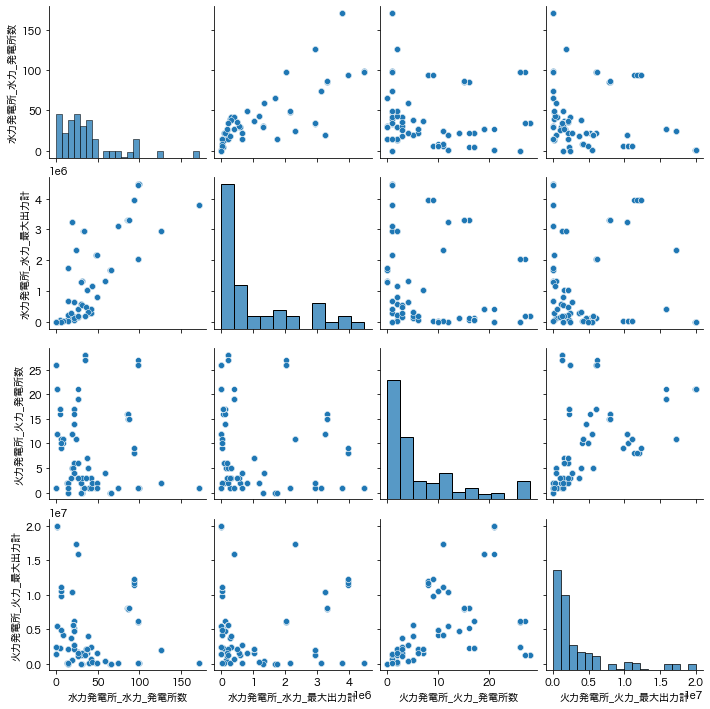

In [65]:
sns.pairplot(viz_data.iloc[:,0:4])

水力×火力は関係性なしなのが見える

## PDF化

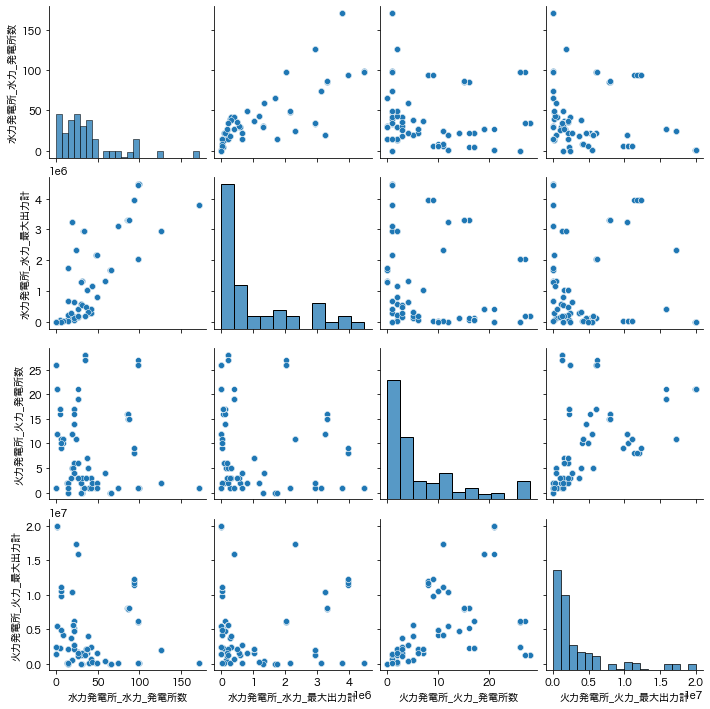

In [66]:
#ファイル名と出力先ディレクトリを指定
graph_file = "Pairplot.pdf"
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

#　保存 (一緒に実行しなければならないっぽい)
sns.pairplot(viz_data.iloc[:,0:4])
plt.savefig(os.path.join(output_dir, graph_file))

## ノック３９：データを整形してExcel形式で出力しよう

Excelへ出力する際の整形は pivot_table を使用すると良い

In [67]:
output = datas_v_all.pivot_table(values='値', columns='項目', index=['年月','都道府県'], aggfunc='sum')
output.head()

項目                  最大出力計   発電所数          電力量
年月      都道府県                                 
2020.10 三重県    6626692.40  172.0  1625270.932
        京都府    3360280.70   41.0  1243810.123
        佐賀県    3168391.00   53.0   924763.770
        兵庫県   14154835.91  162.0  3450951.342
        北海道   11633679.20  329.0  2234014.644

In [68]:
output.to_excel('data/summary_data.xlsx')

## ノック４０：シート別にExcelデータを出力しよう

もっと詳細が見やすいように、都道府県別にシートを変更する  
まずは北海道でやってみる。

In [69]:
target = '北海道'
tmp = datas_v_all.loc[datas_v_all['都道府県']==target]
tmp = tmp.pivot_table(values='値', columns=['発電種別','項目'], index=['年月'], aggfunc='sum')
tmp.head(5)

発電種別      その他               バイオマス                         原子力            \
項目      最大出力計 発電所数  電力量     最大出力計 発電所数         電力量      最大出力計 発電所数  電力量   
年月                                                                        
2020.10   0.0  0.0  0.0  171550.0  4.0   91471.000  2070000.0  1.0  0.0   
2020.11   0.0  0.0  0.0  171550.0  4.0   90170.000  2070000.0  1.0  0.0   
2020.12   0.0  0.0  0.0  171550.0  4.0  159408.321  2070000.0  1.0  0.0   
2020.4    0.0  0.0  0.0   96650.0  3.0  100682.000  2070000.0  1.0  0.0   
2020.5    0.0  0.0  0.0  171550.0  4.0   95219.000  2070000.0  1.0  0.0   

発電種別          地熱  ...      廃棄物         水力                         火力        \
項目         最大出力計  ...      電力量      最大出力計  発電所数       電力量      最大出力計  発電所数   
年月                ...                                                        
2020.10  25000.0  ...  30653.0  2032077.6  98.0  378452.9  6030310.0  26.0   
2020.11  25000.0  ...  33307.0  2032077.6  98.0  375200.5  6030310.0  26.0   
2020.12  25000.0  ...  30196.0  2032077.6  98.0  336637.9  6142310.0  27.0   
2020.4   25000.0  ...  32870.0  2032077.6  98.0  408779.3  6030310.0  26.0   
2020.5   25000.0  ...  28516.0  2032077.6  98.0  754586.8  6030310.0  26.0   

発電種別                        風力                    
項目               電力量     最大出力計  発電所数         電力量  
年月                                                
2020.10  1534179.031  428434.0  57.0   92732.160  
2020.11  1779941.280  458434.0  58.0  124387.828  
2020.12  2404386.912  458434.0  58.0  153589.640  
2020.4   1704768.470  428134.0  56.0   86901.404  
2020.5   1190989.511  428134.0  56.0   84131.144  

[5 rows x 27 columns]

[参考資料](https://runebook.dev/ja/docs/pandas/reference/api/pandas.excelwriter)

In [70]:
writer = pd.ExcelWriter('data/detail_data.xlsx', mode='w')  # 複数のデータを別々のシートに書き出すには、pandas.ExcelWriter()を使用
for target in datas_v_all['都道府県'].unique():
  tmp = datas_v_all.loc[datas_v_all['都道府県']==target]
  tmp = tmp.pivot_table(values='値', columns=['発電種別','項目'], index=['年月'], aggfunc='sum')
  with writer as w:
    tmp.to_excel(w, sheet_name=target)
    

ValueError: I/O operation on closed file

エラーがでてしまう！

ValueError: I/O operation on closed file

北海道のみだとできる。。。for文に入れると閉じてしまい書き込みできない！？

In [71]:
writer = pd.ExcelWriter('data/detail_data.xlsx', mode='w')  # 複数のデータを別々のシートに書き出すには、pandas.ExcelWriter()を使用
#for target in datas_v_all['都道府県'].unique():
target = '北海道'
tmp = datas_v_all.loc[datas_v_all['都道府県']==target]
tmp = tmp.pivot_table(values='値', columns=['発電種別','項目'], index=['年月'], aggfunc='sum')
with writer as w:
  tmp.to_excel(w, sheet_name=target)

逆にファイルを開いている間にfor文を回して書き込んだら出力することができた！！

In [72]:
writer = pd.ExcelWriter('data/detail_data.xlsx', mode='w') 
with writer as w:
    for target in datas_v_all['都道府県'].unique():
        tmp = datas_v_all.loc[datas_v_all['都道府県']==target]
        tmp = tmp.pivot_table(values='値', columns=['発電種別','項目'], index=['年月'], aggfunc='sum')
        tmp.to_excel(w, sheet_name=target)

### 完！！